In [30]:
from nlp_preprocessing_functions import *

import warnings
warnings.filterwarnings('ignore')

In [31]:
# importing dataset

data = pd.read_csv('test.csv') 


# Reviewing the data shape, columns and data types

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


# EDA 

In [32]:
# Percentage of Data Missing Per Column Above 1%

total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Missing Percent'])
missing_data['Missing Percent'] = missing_data['Missing Percent'].apply(lambda x: x * 100)
missing_data.loc[missing_data['Missing Percent'] > .01][:152]

Total  Missing Percent
location   1105        33.864542
keyword      26         0.796813

In [4]:
# Checking for Duplicates 

data[data.duplicated(subset = "text")]

Empty DataFrame
Columns: [id, keyword, location, text]
Index: []

In [ ]:
# Dropping duplicates because the same text is assigned to both target classes
data.drop_duplicates(subset=['text'],inplace=True)

In [ ]:
data[data.duplicated(subset = "text")]

In [5]:
# Unique words
uniqueWords = list(set(' '.join(data['text']).lower().split(' ')))
count = len(uniqueWords)

# Total words
data['total_words'] = data['text'].str.split().str.len()
data['total_words'].sum()

48832

In [6]:
# Identifing Top 25 common words
freq = pd.Series(' '.join(data['text']).split()).value_counts()[:25]
freq

the      1045
to        808
a         767
of        750
in        739
and       547
I         475
is        373
on        336
for       311
-         300
you       274
my        248
The       241
by        218
with      196
it        188
at        181
that      176
from      169
are       164
be        163
was       155
this      144
&amp;     134
dtype: int64

In [7]:
# Identify the least 25 uncommon words
freq1 =  pd.Series(' '.join(data['text']).split()).value_counts()[-25:]
freq1

NIA                        1
TIX                        1
buzzy                      1
19...                      1
06:00                      1
Muslim                     1
GAME:                      1
7'                         1
@ShojoShit                 1
systems.                   1
nerve                      1
Grove?                     1
Homeless                   1
https://t.co/XX8RO94fBC    1
.@MartinMJ22               1
raped                      1
behind.                    1
w/weapons..                1
HYDERABAD:                 1
@Rawrheem:                 1
spends                     1
http://t.co/7C2qhMwtv5     1
Trail                      1
them?!                     1
chemical'                  1
dtype: int64

In [8]:
# Dropping ID column by name

data = data.drop(['id'], axis = 1)

In [9]:
# Checking Removal of ID Column

data.head()

keyword location                                               text  \
0     NaN      NaN                 Just happened a terrible car crash   
1     NaN      NaN  Heard about #earthquake is different cities, s...   
2     NaN      NaN  there is a forest fire at spot pond, geese are...   
3     NaN      NaN           Apocalypse lighting. #Spokane #wildfires   
4     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan   

   total_words  
0            6  
1            9  
2           19  
3            4  
4            8

In [12]:
data['total_words'].mean()

14.965369292062519

In [13]:
fig = go.Figure()
fig.add_trace(go.Histogram(x = data['total_words'], 
                           name = "count", 
                           texttemplate = "%{x}", 
                           textfont_size = 20))
fig.show()

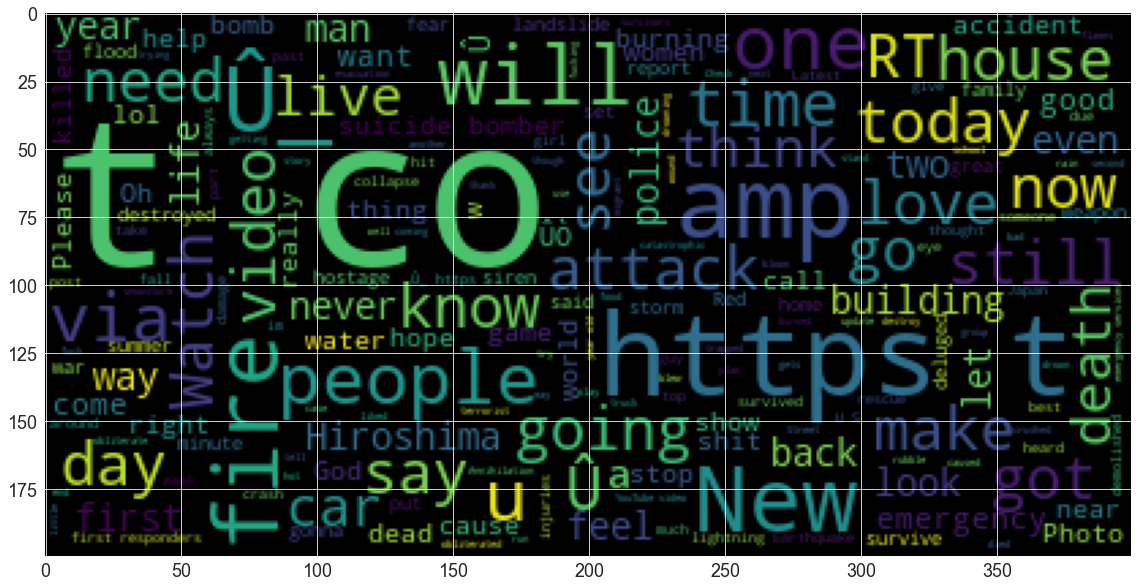

In [14]:
tweet_text = (data['text']).tolist()

tweet_text_as_one_string = ' '.join(tweet_text)

plt.figure(figsize=(20,10))
plt.imshow(WordCloud().generate(tweet_text_as_one_string));

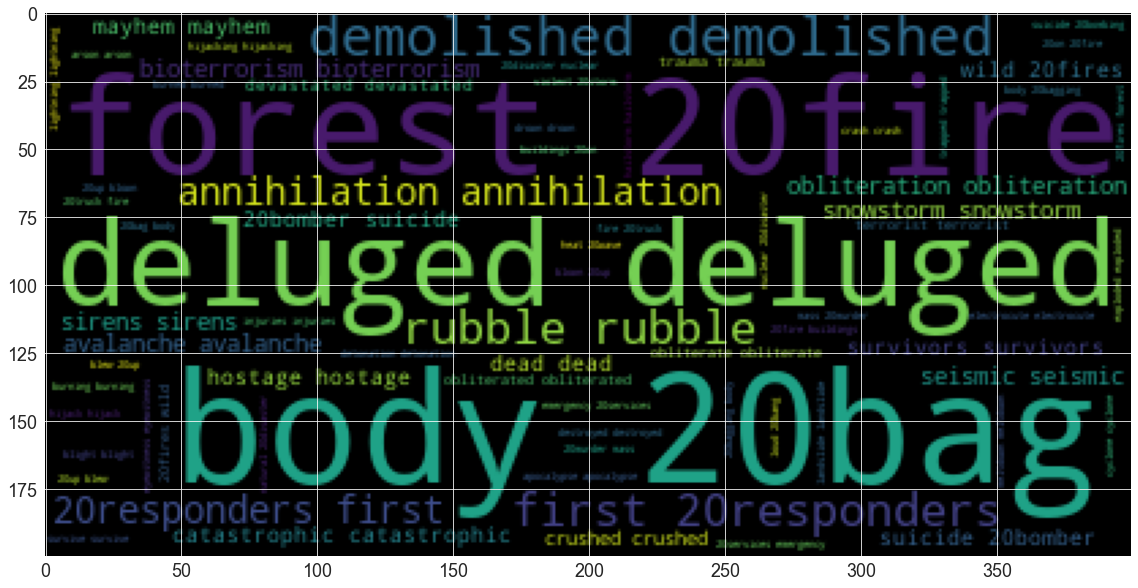

In [15]:
keyword = data['keyword'].dropna()
keyword_tweet_text = keyword.tolist()
keyword_tweet_text_as_one_string = ' '.join(keyword_tweet_text)

plt.figure(figsize=(20,10))
plt.imshow(WordCloud().generate(keyword_tweet_text_as_one_string));

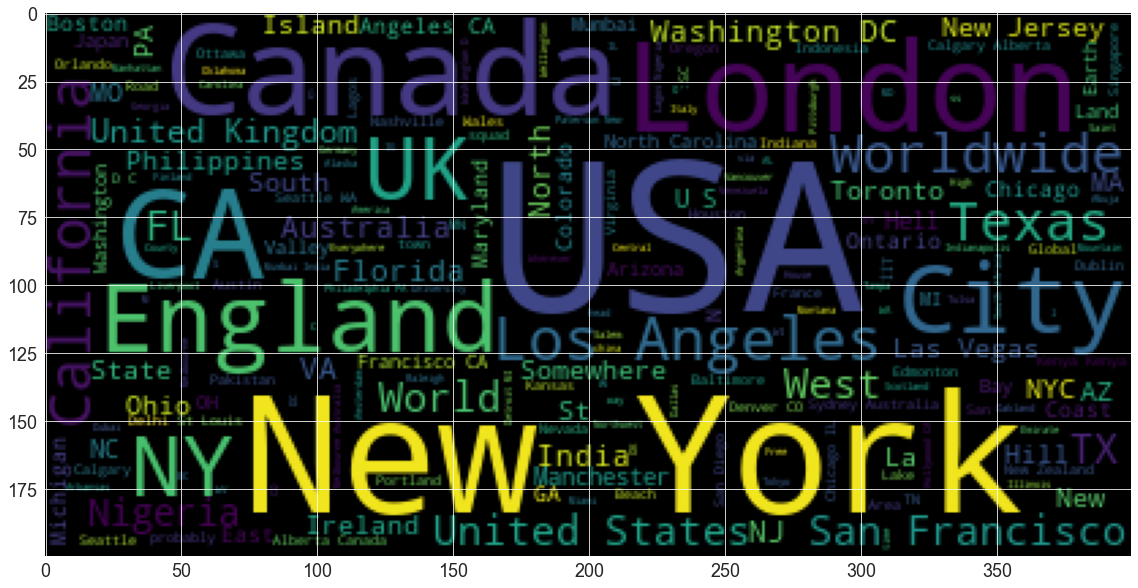

In [16]:
location = data['location'].dropna()
location_tweet_text = location.tolist()
location_tweet_text_as_one_string = ' '.join(location_tweet_text)

plt.figure(figsize=(20,10))
plt.imshow(WordCloud().generate(location_tweet_text_as_one_string));

# Cleaning

In [98]:
# Using the NLP Preprocessing Functions from the Py File for Cleaning

In [17]:
sample = data.text[100]

In [18]:
sample

'BROOO HE JUST GOT ANNIHILATED https://t.co/UR7QkqG1wf'

In [19]:
text_preprocesser_nlp(sample)

'brook get annihilate'

In [20]:
# Cleaning the entire text column for the train  dataset

In [21]:
data['text'] = data.text.apply(lambda text: text_preprocesser_nlp(text))

In [22]:
data.sample(frac = .2)

keyword                        location  \
3250       wrecked               Brussels, Belgium   
2960       trapped                             NaN   
767      collision                 Denver Colorado   
978        deluged         Camberville (Bostonish)   
1104    desolation                 Subconscious LA   
...            ...                             ...   
290          blaze                   Cleveland, OH   
1273         drown  East Carolina University'19 ??   
117   annihilation                         Chicago   
798        crashed                  Estados Unidos   
2872     terrorist                     MAD as Hell   

                                                   text  total_words  
3250  segovia garbage get wreck red bull reserve tea...           19  
2960   les win hospital break leg trap cave press photo           18  
767   motorcyclist bicyclist injure denver collision...           18  
978                believe occur deluge kickstart email           17  
1104  emotional desolation effect alcoholismaddictio...           14  
...                                                 ...          ...  
290                                  get pay fuck blaze           14  
1273                                         fuck drown            6  
117   yous national park service tonto national fore...           19  
798   bin laden family plane crash avoid microlight ...           19  
2872    abbswinston demolish tire repair shop structure           13  

[653 rows x 4 columns]

In [23]:
# Additonal Cleaning: Removing low occurrence words (Word count of less than 5)

In [24]:
freq = pd.Series(' '.join(data['text']).split()).value_counts()
low_freq = list(freq.loc[freq < 5].index)
data['text'] = data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in low_freq))

In [25]:
# Identifing Top 25 common words
freq = pd.Series(' '.join(data['text']).split()).value_counts()[:25]
freq

like         166
fire         165
new          114
go           103
people        91
get           90
attack        85
burn          81
news          76
year          76
kill          74
emergency     73
watch         68
time          67
bomb          66
crash         66
come          64
think         64
pm            64
video         63
disaster      61
know          60
storm         58
suicide       57
service       56
dtype: int64

In [26]:
# Identify the least 25 uncommon words
freq1 =  pd.Series(' '.join(data['text']).split()).value_counts()[-25:]
freq1

friday       5
chief        5
future       5
gain         5
board        5
lap          5
meek         5
portland     5
protect      5
move         5
rare         5
east         5
bear         5
vine         5
animal       5
career       5
flat         5
stick        5
rioting      5
ukraine      5
aftermath    5
field        5
number       5
bay          5
fish         5
dtype: int64

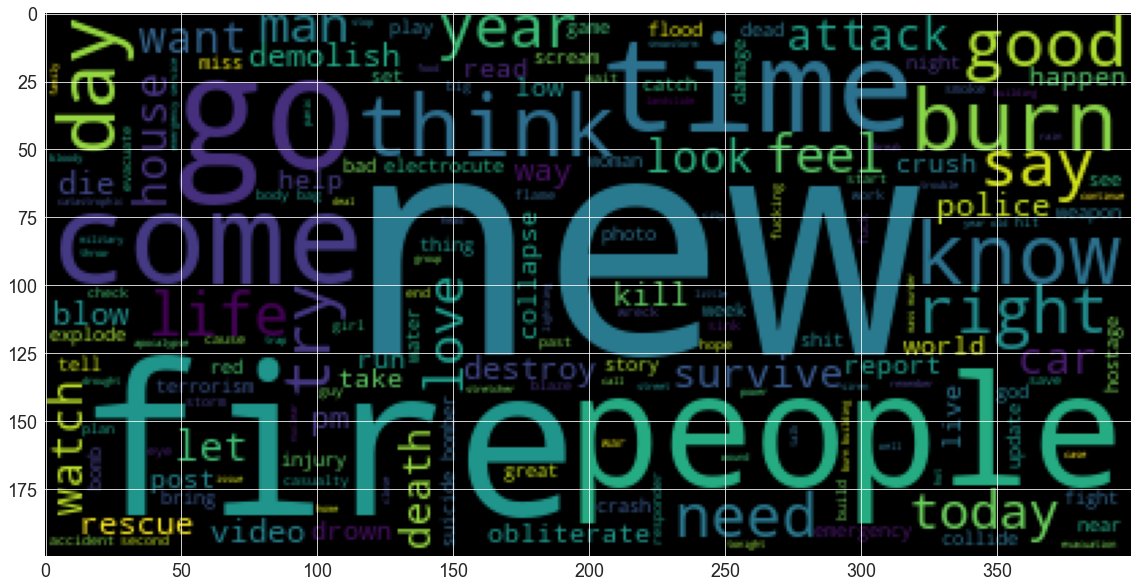

In [28]:
clean_tweet_text = (data['text']).tolist()

clean_text_as_one_string = ' '.join(clean_tweet_text)

plt.figure(figsize=(20,10))
plt.imshow(WordCloud().generate(clean_text_as_one_string));

In [29]:
data.to_csv('preprocessed_clean_test_set.csv', index = False)